# Análisis y visualización de datos de Tokyo_Airbnb

<img src="https://upload.wikimedia.org/wikipedia/commons/6/69/Airbnb_Logo_B%C3%A9lo.svg" style= "height:150px;float:left;">

### Presentamos este informe donde analizaremos los datos de Airbnb en Tokio. Intentaremos averiguar qué características tienen un impacto en el precio de un lugar. y responderemos a algunas preguntas como:
### ¿Cuáles son las épocas más concurridas del año para visitar Tokio? ¿Cuál es la tasa de ocupación? ¿En qué medida se disparan los precios?
### ¿Qué tipo de alojamientos es más solicitado? (apartamento completo, compartido o privado)
### ¿Qué barrio es más popular?
### ¿Qué barrio es el más caro y más barato?
### ¿Cuál es el precio medio por alojamiento?

## Análisis Exploratorio de datos (EDA)

## Fase 1. Entendimiento de los datos

In [1]:
# Importar librerías a utilizar en el análisis de datos 
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
#import geopandas as gpd
import plotly.express as px
# from IPython.display import HTsz

%matplotlib inline
%reload_ext autoreload
%autoreload 2

### 1.1 Recolectar datos iniciales

In [2]:
# Importar base de datos
datos = pd.read_csv('tokyo_airbnb.csv')
datos

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month
0,35303,"La Casa Gaienmae C Harajuku, Omotesando is nearby",151977,Miyuki,NaN,Shibuya Ku,35.67152,139.71203,Private room,4196,28,18,2018-07-28,0.20
1,197677,Oshiage Holiday Apartment,964081,Yoshimi & Marek,NaN,Sumida Ku,35.71721,139.82596,Entire home/apt,10975,3,156,2019-05-21,1.65
2,289597,Private apt in central Tokyo #203,341577,Hide&Kei,NaN,Nerima Ku,35.74267,139.65810,Entire home/apt,4196,30,107,2019-05-25,1.25
3,370759,"Cozy flat #203, local area YET 10 mins to shib...",1573631,"Gilles,Mayumi,Taiki",NaN,Setagaya Ku,35.66344,139.65593,Entire home/apt,6994,29,99,2019-05-07,1.55
4,700253,Private apt in central Tokyo #201,341577,Hide&Kei,NaN,Nerima Ku,35.74264,139.65832,Entire home/apt,3981,30,101,2019-05-03,1.24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11461,36083287,1min to station · Skytree/Tatami hotel/new design,235406925,Sayoko佐代子,NaN,Sumida Ku,35.70862,139.81393,Entire home/apt,21951,1,0,NaN,NaN
11462,36083512,Asakusa Wired house 5pax near by UENO/AKIHABARA,267481408,Hyongsu,NaN,Taito Ku,35.72464,139.78078,Entire home/apt,7747,1,0,NaN,NaN
11463,36084566,东京精品民宿,161702799,Yang,NaN,Toshima Ku,35.73587,139.73397,Private room,56275,1,0,NaN,NaN
11464,36085357,#4 DIRECT ACCESS TO DISNEY IN BUS! 3MIN TO STA...,208189463,Shotaro,NaN,Edogawa Ku,35.66255,139.87236,Entire home/apt,6456,1,0,NaN,NaN


### 1.2 Descripción de los datos

In [3]:
# Información de las variables de entrada.
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11466 entries, 0 to 11465
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   11466 non-null  int64  
 1   name                 11466 non-null  object 
 2   host_id              11466 non-null  int64  
 3   host_name            11450 non-null  object 
 4   neighbourhood_group  0 non-null      float64
 5   neighbourhood        11466 non-null  object 
 6   latitude             11466 non-null  float64
 7   longitude            11466 non-null  float64
 8   room_type            11466 non-null  object 
 9   price                11466 non-null  int64  
 10  minimum_nights       11466 non-null  int64  
 11  number_of_reviews    11466 non-null  int64  
 12  last_review          9789 non-null   object 
 13  reviews_per_month    9789 non-null   float64
dtypes: float64(4), int64(5), object(5)
memory usage: 1.2+ MB


In [7]:
# Descripción de los datos:
# id : Número de identificación del registro.                   
# name: Nombre del alojamiento como lo promociona el anfitrión en en la página.            
# host_id: Número de identificación del alojamiento o anfitrión.               
# host_name: Nombre del alojamiento o anfitrión.   
# neighbourhood_group: Comunidad o distrito donde se localiza el alojamiento.
# neighbourhood: Barrio en el que se localiza el alojamiento.       
# latitude: Latitud de la localización física del alojamiento.         
# longitude: longitud de la localización física del alojmiento.        
# room_type: Tipo de alojamiento que promociona el anfitrión.     
# price: Precio del alojamiento.            
# minimum_nights: Noches mínimas requeridas para el alquiler (exigido por el anfitrión en la promoción).
# number_of_reviews: Cantidad de valoraciones acumuladas realiadas por los clientes en un mes.
# last_review: Fecha de la última valoración realizada por el cliente.      
# reviews_per_month: Valoración por mes que mide la satisfacción del cliente (Rango de 0 a 100).


### 1.3 Exploración de datos

In [4]:
# Determinar variables categóricas y numéricas
# Visualización de un subconjunto del dataset donde se muestran las variables numéricas (ORDENADAS priorisando el id del alojamiento o anfitrión)
vcategoricas=datos[["id", "host_id", "host_name", "name", "neighbourhood_group", "neighbourhood", "latitude", "longitude", "room_type", "last_review"]]
vcategoricas.head(5)

,id,host_id,host_name,name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,last_review
0,35303,151977,Miyuki,"La Casa Gaienmae C Harajuku, Omotesando is nearby",NaN,Shibuya Ku,35.67152,139.71203,Private room,2018-07-28
1,197677,964081,Yoshimi & Marek,Oshiage Holiday Apartment,NaN,Sumida Ku,35.71721,139.82596,Entire home/apt,2019-05-21
2,289597,341577,Hide&Kei,Private apt in central Tokyo #203,NaN,Nerima Ku,35.74267,139.65810,Entire home/apt,2019-05-25
3,370759,1573631,"Gilles,Mayumi,Taiki","Cozy flat #203, local area YET 10 mins to shib...",NaN,Setagaya Ku,35.66344,139.65593,Entire home/apt,2019-05-07
4,700253,341577,Hide&Kei,Private apt in central Tokyo #201,NaN,Nerima Ku,35.74264,139.65832,Entire home/apt,2019-05-03


In [5]:
# Visualización de un subconjunto del dataset donde se muestran las variables numéricas. 
vnumericas=datos[["price", "minimum_nights","number_of_reviews","reviews_per_month"]]
vnumericas.head(5)

,price,minimum_nights,number_of_reviews,reviews_per_month
0,4196,28,18,0.20
1,10975,3,156,1.65
2,4196,30,107,1.25
3,6994,29,99,1.55
4,3981,30,101,1.24


In [6]:
# Principales descriptores estadisticos del dataset que contiene variables numericas (vnumericas)
vnumericas.describe()

,price,minimum_nights,number_of_reviews,reviews_per_month
count,1.146600e+04,11466.000000,11466.000000,9789.000000
mean,1.498470e+04,3.316239,26.028868,2.262540
std,3.327345e+04,7.766766,38.455449,1.744004
min,0.000000e+00,1.000000,0.000000,0.040000
25%,6.026000e+03,1.000000,2.000000,1.000000
50%,1.000700e+04,1.000000,12.000000,2.060000
75%,1.721600e+04,2.000000,32.000000,3.170000
max,1.000046e+06,180.000000,453.000000,51.210000


<AxesSubplot:>

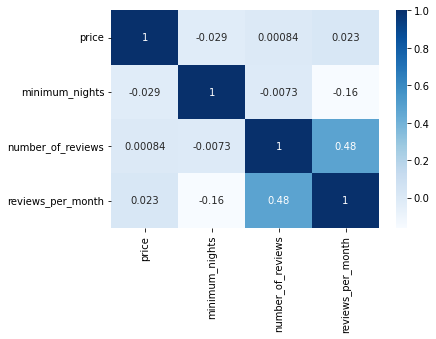

In [7]:
# Evaluando correlación entre precio, número de noches mínimas, número de revisiones, calificación por mes (0-100).
sns.heatmap(vnumericas.corr(), annot=True, cmap='Blues')

In [8]:
#Conclusión
# R= 0.029 Existe nula correlación entre precio y número de noches mínimas.
# R= 0.00084 Existe nula correlación entre precio y número de revisiones.
# R= 0.023 Existe nula correlación entre precio y valoraciones por mes.
# R= 0.16 Existe nula correlación entre número de noches mínimas y valoraciones por mes.
# R= 0.0073 Existe nula correlación entre número de noches mínimas y número de revisiones.
# R= 0.48 Existe debil correlación entre número de revisiones y valoraciones por mes.

<AxesSubplot:xlabel='minimum_nights', ylabel='price'>

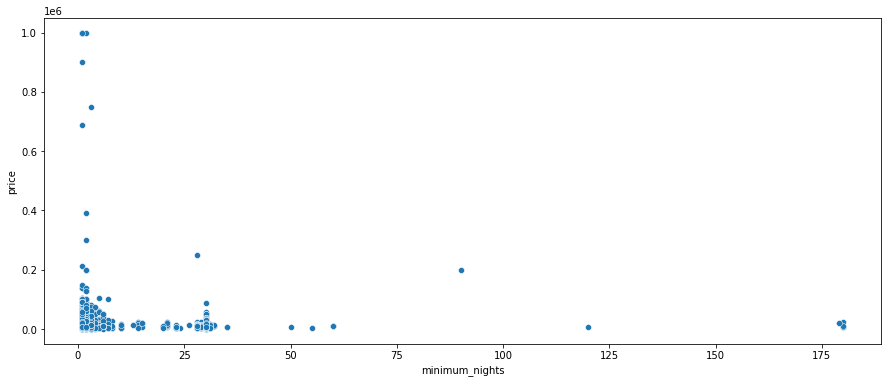

In [24]:
# Evaluando precios vs número de noches mínimas 
plt.figure(figsize=(15,6))
dfvnum_precio1=datos[["price", "minimum_nights"]]
dfvnum_precio1
sns.scatterplot(data = dfvnum_precio1, x= 'minimum_nights', y ='price')


In [ ]:
# Conclusión:
# Se obseva muchos datos dispersos, al parecer atípicos, pero para una correcta comparación de precios en función al 
# número de noches, es recomendable normalizar la información a precios por 1 noche (generación de columna alquiler por noche)
# y considerando el tipo de habitación. 


<AxesSubplot:xlabel='number_of_reviews', ylabel='price'>

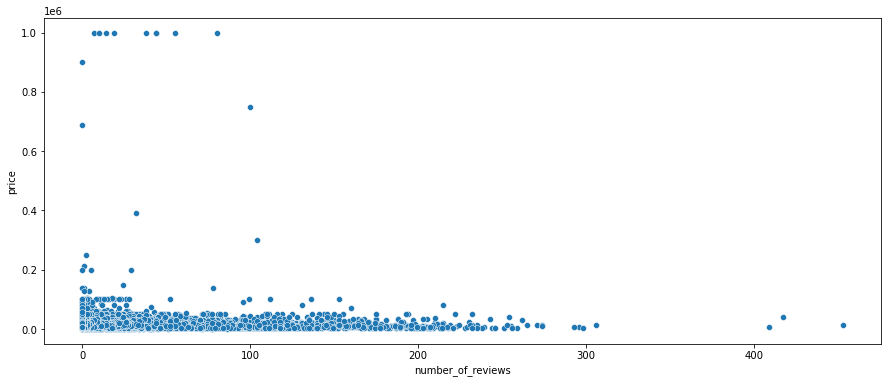

In [25]:
# Evaluando precios vs number_of_reviews 
plt.figure(figsize=(15,6))
dfvnum_precio1=datos[["price", "number_of_reviews"]]
dfvnum_precio1
sns.scatterplot(data = dfvnum_precio1, x= 'number_of_reviews', y ='price')

In [ ]:
# Conclusión:
# Se obseva que los alojamientos con precios más bajos presentan menor número de valoraciones, 
# pero presentan una debil correlación.


<AxesSubplot:xlabel='reviews_per_month', ylabel='price'>

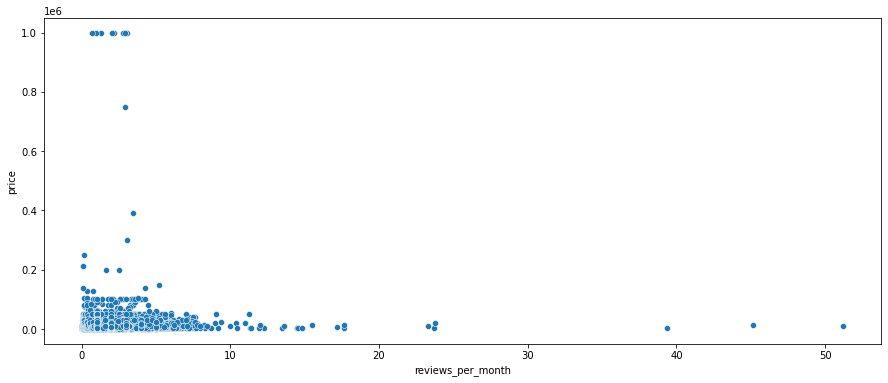

In [26]:
# Evaluando precios vs reviews_per_month 
plt.figure(figsize=(15,6))
dfvnum_precio1=datos[["price", "reviews_per_month"]]
dfvnum_precio1
sns.scatterplot(data = dfvnum_precio1, x= 'reviews_per_month', y ='price')

In [ ]:
# Conclusión:
# Se obseva que los alojamientos con precios más bajos presentan menor valoración, quizás por ser más accesibles 
# la calidad de sus servicios sea menor.

### 1.4 Verificar calidad de los datos

In [27]:
# A) IDENTIFICAR VALORES NULOS
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11466 entries, 0 to 11465
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   11466 non-null  int64  
 1   name                 11466 non-null  object 
 2   host_id              11466 non-null  int64  
 3   host_name            11450 non-null  object 
 4   neighbourhood_group  0 non-null      float64
 5   neighbourhood        11466 non-null  object 
 6   latitude             11466 non-null  float64
 7   longitude            11466 non-null  float64
 8   room_type            11466 non-null  object 
 9   price                11466 non-null  int64  
 10  minimum_nights       11466 non-null  int64  
 11  number_of_reviews    11466 non-null  int64  
 12  last_review          9789 non-null   object 
 13  reviews_per_month    9789 non-null   float64
dtypes: float64(4), int64(5), object(5)
memory usage: 1.2+ MB


In [ ]:
# Comentario sobre el dataset:
# 1.Hay 14 columnas (características) y 11466 registros.
# 2.Hay 4 columnas con datos faltantes:
#   - host_name            11450 non-null  object 
#   - neighbourhood_group  0 non-null      float64
#   - last_review          9789 non-null   object 
#   - reviews_per_month    9789 non-null   float64

In [28]:
# Cuantos missing values (valores vacíos) hay en el dataset por cada columna
datos.isnull().sum()

id                         0
name                       0
host_id                    0
host_name                 16
neighbourhood_group    11466
neighbourhood              0
latitude                   0
longitude                  0
room_type                  0
price                      0
minimum_nights             0
number_of_reviews          0
last_review             1677
reviews_per_month       1677
dtype: int64

In [ ]:
# Los valores vacíos por columna son: 
# host_name                 16
# neighbourhood_group    11466
# last_review             1677
# reviews_per_month       1677


In [29]:
# Se ordena por  % nulos
datos.isnull().mean().sort_values(ascending = False)

neighbourhood_group    1.000000
last_review            0.146259
reviews_per_month      0.146259
host_name              0.001395
id                     0.000000
name                   0.000000
host_id                0.000000
neighbourhood          0.000000
latitude               0.000000
longitude              0.000000
room_type              0.000000
price                  0.000000
minimum_nights         0.000000
number_of_reviews      0.000000
dtype: float64

In [ ]:
# Una ves identificado los porcentajes de los valores nulos, se sugiere:
# - Eliminar los campos que tienen el 100% de valores nulos (neighbourhood_group)
# - Eliminar los campos que presenten más del 20% de valores nulos (ninguno)

In [ ]:
# B) IDENTIFICAR REGISTROS DUPLICADOS

In [30]:
# Visualizar la cantidad de registros duplicados
datos.duplicated().sum()

0

In [32]:
# Aparentemente no existe registros duplicados porque se tiene la columna ID que asigna un número 
# específico para cada registro, por lo tanto para la verificación de duplicados se debe eliminar ID.
# a. Eliminar la columna ID 
datos2=datos.drop(columns=["id"])
datos2

,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month
0,"La Casa Gaienmae C Harajuku, Omotesando is nearby",151977,Miyuki,NaN,Shibuya Ku,35.67152,139.71203,Private room,4196,28,18,2018-07-28,0.20
1,Oshiage Holiday Apartment,964081,Yoshimi & Marek,NaN,Sumida Ku,35.71721,139.82596,Entire home/apt,10975,3,156,2019-05-21,1.65
2,Private apt in central Tokyo #203,341577,Hide&Kei,NaN,Nerima Ku,35.74267,139.65810,Entire home/apt,4196,30,107,2019-05-25,1.25
3,"Cozy flat #203, local area YET 10 mins to shib...",1573631,"Gilles,Mayumi,Taiki",NaN,Setagaya Ku,35.66344,139.65593,Entire home/apt,6994,29,99,2019-05-07,1.55
4,Private apt in central Tokyo #201,341577,Hide&Kei,NaN,Nerima Ku,35.74264,139.65832,Entire home/apt,3981,30,101,2019-05-03,1.24
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11461,1min to station · Skytree/Tatami hotel/new design,235406925,Sayoko佐代子,NaN,Sumida Ku,35.70862,139.81393,Entire home/apt,21951,1,0,NaN,NaN
11462,Asakusa Wired house 5pax near by UENO/AKIHABARA,267481408,Hyongsu,NaN,Taito Ku,35.72464,139.78078,Entire home/apt,7747,1,0,NaN,NaN
11463,东京精品民宿,161702799,Yang,NaN,Toshima Ku,35.73587,139.73397,Private room,56275,1,0,NaN,NaN
11464,#4 DIRECT ACCESS TO DISNEY IN BUS! 3MIN TO STA...,208189463,Shotaro,NaN,Edogawa Ku,35.66255,139.87236,Entire home/apt,6456,1,0,NaN,NaN


In [33]:
# Visualizar la cantidad de registros duplicados
datos2.duplicated().sum()

0

In [ ]:
# CONCLUSIÓN: una vez eliminado la columna ID, se verifica que no existe registros duplicados, por lo tanto
# NO corresponde eliminar registros por duplicidad.

## FASE 2: PREPARACIÓN DE LOS DATOS

In [ ]:
### 2.1 Seleccionar los datos

In [19]:
# Examinar el dataset
datos

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month
0,35303,"La Casa Gaienmae C Harajuku, Omotesando is nearby",151977,Miyuki,NaN,Shibuya Ku,35.67152,139.71203,Private room,4196,28,18,2018-07-28,0.20
1,197677,Oshiage Holiday Apartment,964081,Yoshimi & Marek,NaN,Sumida Ku,35.71721,139.82596,Entire home/apt,10975,3,156,2019-05-21,1.65
2,289597,Private apt in central Tokyo #203,341577,Hide&Kei,NaN,Nerima Ku,35.74267,139.65810,Entire home/apt,4196,30,107,2019-05-25,1.25
3,370759,"Cozy flat #203, local area YET 10 mins to shib...",1573631,"Gilles,Mayumi,Taiki",NaN,Setagaya Ku,35.66344,139.65593,Entire home/apt,6994,29,99,2019-05-07,1.55
4,700253,Private apt in central Tokyo #201,341577,Hide&Kei,NaN,Nerima Ku,35.74264,139.65832,Entire home/apt,3981,30,101,2019-05-03,1.24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11461,36083287,1min to station · Skytree/Tatami hotel/new design,235406925,Sayoko佐代子,NaN,Sumida Ku,35.70862,139.81393,Entire home/apt,21951,1,0,NaN,NaN
11462,36083512,Asakusa Wired house 5pax near by UENO/AKIHABARA,267481408,Hyongsu,NaN,Taito Ku,35.72464,139.78078,Entire home/apt,7747,1,0,NaN,NaN
11463,36084566,东京精品民宿,161702799,Yang,NaN,Toshima Ku,35.73587,139.73397,Private room,56275,1,0,NaN,NaN
11464,36085357,#4 DIRECT ACCESS TO DISNEY IN BUS! 3MIN TO STA...,208189463,Shotaro,NaN,Edogawa Ku,35.66255,139.87236,Entire home/apt,6456,1,0,NaN,NaN


In [20]:
# CONCLUSIÓN: Se observa que la columna host_id y host_name reportan la misma información para identificar al alojamiento, por lo tanto se debe eliminar
# la columna host_id y conservar la columna host_name.
# datos3=datos2.drop(columns=["host_id"])
# datos3


In [37]:
# Estadisticos descriptivos en funcion al PRECIO por grupo de NEIGHBOURHOOD (barrios).
b = pd.DataFrame(datos['neighbourhood'].unique(),columns=['BARRIO'])
b['cantidad'] = datos[['price','neighbourhood']].groupby('neighbourhood').count().price.tolist()
b['precio alto'] = datos[['price','neighbourhood']].groupby('neighbourhood').max().price.tolist()
b['precio bajo'] = datos[['price','neighbourhood']].groupby('neighbourhood').min().price.tolist()
b['precio mediano'] = datos[['price','neighbourhood']].groupby('neighbourhood').median().price.tolist()
b['std precio'] = datos[['price','neighbourhood']].groupby('neighbourhood').std().price.tolist()
b['25% de precio'] = datos[['price','neighbourhood']].groupby('neighbourhood').quantile(0.25).price.tolist()
b['75% de precio'] = datos[['price','neighbourhood']].groupby('neighbourhood').quantile(0.75).price.tolist()
b['cuartil'] = np.array(datos[['price','neighbourhood']].groupby('neighbourhood').quantile(0.75).price.tolist()) - np.array(datos[['price','neighbourhood']].groupby('neighbourhood').quantile(0.25).price.tolist())
b

,BARRIO,cantidad,precio alto,precio bajo,precio mediano,std precio,25% de precio,75% de precio,cuartil
0,Shibuya Ku,172,50035,1184,5972.0,7383.745984,2743.75,10007.00,7263.25
1,Sumida Ku,12,10007,2044,4519.0,1868.108675,4384.50,5488.00,1103.50
2,Nerima Ku,3,50035,3551,3874.0,26744.795463,3712.50,26954.50,23242.00
3,Setagaya Ku,279,99962,2044,9039.0,10519.888353,5810.00,14957.00,9147.00
4,Arakawa Ku,129,105019,4089,10007.0,14094.732238,5488.00,13450.00,7962.00
5,Shinjuku Ku,198,1000046,1506,12482.0,155263.993998,6509.75,21385.50,14875.75
6,Mitaka Shi,11,31958,3013,6994.0,8167.251281,5918.00,10383.50,4465.50
7,Adachi Ku,448,74568,2044,12051.0,12964.376871,5380.25,20014.00,14633.75
8,Katsushika Ku,201,99962,1399,8500.0,11856.061846,5488.00,14957.00,9469.00
9,Meguro Ku,4,20014,3766,12374.5,6965.919531,8285.50,16221.25,7935.75


In [36]:
# Estadisticos descriptivos en funcion al REVIEWS_PER_MONTH (valoraciones por mes, en el rango de 0 a 100, mide satisfacción del cliente) por NEIGHBOURHOOD (grupos de barrios)
c = pd.DataFrame(datos['neighbourhood'].unique(),columns=['BARRIO'])
c['cantidad'] = datos[['reviews_per_month','neighbourhood']].groupby('neighbourhood').count().reviews_per_month.tolist()
c['valoración alta'] = datos[['reviews_per_month','neighbourhood']].groupby('neighbourhood').max().reviews_per_month.tolist()
c['valoración baja'] = datos[['reviews_per_month','neighbourhood']].groupby('neighbourhood').min().reviews_per_month.tolist()
c['valoración mediana'] = datos[['reviews_per_month','neighbourhood']].groupby('neighbourhood').median().reviews_per_month.tolist()
c['std valoración'] = datos[['reviews_per_month','neighbourhood']].groupby('neighbourhood').std().reviews_per_month.tolist()
c['25% de valoración'] = datos[['reviews_per_month','neighbourhood']].groupby('neighbourhood').quantile(0.25).reviews_per_month.tolist()
c['75% de valoración'] = datos[['reviews_per_month','neighbourhood']].groupby('neighbourhood').quantile(0.75).reviews_per_month.tolist()
c['cuartil'] = np.array(datos[['reviews_per_month','neighbourhood']].groupby('neighbourhood').quantile(0.75).reviews_per_month.tolist()) - np.array(datos[['reviews_per_month','neighbourhood']].groupby('neighbourhood').quantile(0.25).reviews_per_month.tolist())
c

,BARRIO,cantidad,valoración alta,valoración baja,valoración mediana,std valoración,25% de valoración,75% de valoración,cuartil
0,Shibuya Ku,139,4.59,0.04,1.000,1.202815,0.3200,2.1000,1.7800
1,Sumida Ku,9,3.52,0.09,1.000,1.161078,0.3800,1.7800,1.4000
2,Nerima Ku,2,2.02,0.47,1.245,1.096016,0.8575,1.6325,0.7750
3,Setagaya Ku,215,23.73,0.07,1.340,2.162949,0.6600,3.0950,2.4350
4,Arakawa Ku,112,10.00,0.23,2.860,1.537154,2.0000,3.6450,1.6450
5,Shinjuku Ku,152,17.63,0.09,1.145,1.969071,0.6575,2.6950,2.0375
6,Mitaka Shi,10,5.19,0.53,2.200,1.421447,1.3900,3.0000,1.6100
7,Adachi Ku,379,51.21,0.08,1.820,3.242090,0.6950,3.1950,2.5000
8,Katsushika Ku,171,5.48,0.07,1.470,1.369465,0.6500,2.7900,2.1400
9,Meguro Ku,3,5.05,1.12,2.300,2.016590,1.7100,3.6750,1.9650


In [34]:

# Estadisticos descriptivos en funcion al PRECIO (precio del alojamiento) por NAME (nombre del alojamiento como lo promociona el anfitrión).
d = pd.DataFrame(datos['name'].unique(),columns=['NAME'])
d['cantidad'] = datos[['price','name']].groupby('name').count().price.tolist()
d['valoración alta'] = datos[['price','name']].groupby('name').max().price.tolist()
d['valoración baja'] = datos[['price','name']].groupby('name').min().price.tolist()
d['valoración mediana'] = datos[['price','name']].groupby('name').median().price.tolist()
d['std valoración'] = datos[['price','name']].groupby('name').std().price.tolist()
d['25% de valoración'] = datos[['price','name']].groupby('name').quantile(0.25).price.tolist()
d['75% de valoración'] = datos[['price','name']].groupby('name').quantile(0.75).price.tolist()
d['cuartil'] = np.array(datos[['price','name']].groupby('name').quantile(0.75).price.tolist()) - np.array(datos[['price','name']].groupby('name').quantile(0.25).price.tolist())
d.head(80)


,NAME,cantidad,valoración alta,valoración baja,valoración mediana,std valoración,25% de valoración,75% de valoración,cuartil
0,"La Casa Gaienmae C Harajuku, Omotesando is nearby",1,14957,14957,14957.0,NaN,14957.0,14957.0,0.0
1,Oshiage Holiday Apartment,1,103297,103297,103297.0,NaN,103297.0,103297.0,0.0
2,Private apt in central Tokyo #203,1,10007,10007,10007.0,NaN,10007.0,10007.0,0.0
3,"Cozy flat #203, local area YET 10 mins to shib...",1,3336,3336,3336.0,NaN,3336.0,3336.0,0.0
4,Private apt in central Tokyo #201,1,10007,10007,10007.0,NaN,10007.0,10007.0,0.0
...,...,...,...,...,...,...,...,...,...
75,"Shibuya, near Harajuku 2BR (MDS2BR)",1,5488,5488,5488.0,NaN,5488.0,5488.0,0.0
76,Like a Tokyo Local in Equipped 34㎡,1,50035,50035,50035.0,NaN,50035.0,50035.0,0.0
77,(3) 11mins Shinjuku. 17mins Shibuya. -JR Jujo ...,1,3228,3228,3228.0,NaN,3228.0,3228.0,0.0
78,SHIBUYA12min/Fancy&Warm house,1,20982,20982,20982.0,NaN,20982.0,20982.0,0.0


In [31]:
len(d)

10810

In [38]:
# CONCLUSIÓN: Existen pocos alojamientos (656) que han sido alquilados con mayor frecuencia (posiblemnete en 1 mes).
# frec_alojamiento= Alojamientos que han sido alquilados más de una vez.
frec_alojamiento=len(datos)-len(d)
frec_alojamiento

656

In [39]:
# lISTANDO REGISTROS VACIOS EN LA COLUMNA HOST_NAME
#dd=datos[datos.host_name == " "]
#dd

datos_host_name_nulos=datos[datos['host_name'].isnull()]
datos_host_name_nulos

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month
711,11679419,”305”TOKYOSKYTREE 1 minute walking FreeWIFI,62035844,NaN,NaN,Sumida Ku,35.71129,139.81322,Entire home/apt,10007,1,199,2019-06-04,5.09
2080,20046849,Private Residence 606 in Asakusa Central Area!!!,139017121,NaN,NaN,Taito Ku,35.70700,139.79377,Entire home/apt,10975,2,73,2019-06-06,3.21
2390,20907318,Asakusa #1min to Ryogoku station#Max4#Free Wifi,150232625,NaN,NaN,Sumida Ku,35.69512,139.79377,Entire home/apt,14849,1,15,2019-06-08,0.76
3336,23678271,"Asakusa,Ueno #Ryogoku station 1min#Max4#Free Wifi",150232625,NaN,NaN,Sumida Ku,35.69406,139.79203,Entire home/apt,14849,1,27,2019-05-26,1.73
3337,23679413,"Asakusa area#near to Akihabara,Ueno#Max7#Free ...",150232625,NaN,NaN,Katsushika Ku,35.71565,139.85742,Entire home/apt,23780,1,11,2019-01-28,0.74
6417,29451854,Exellent Location# Ryogoku 1 minute#Max 7 #wifi,150232625,NaN,NaN,Sumida Ku,35.69506,139.79374,Entire home/apt,25824,1,5,2019-06-05,0.99
6421,29453466,Near Shinjuku/Nishi Shinjuku Gochome 6min.新宿/地...,150232625,NaN,NaN,Shibuya Ku,35.68621,139.67845,Entire home/apt,22811,1,7,2019-03-10,1.20
6444,29479700,Near Shinjuku / Big Balcony City View.西新宿五丁目6分 新宿,150232625,NaN,NaN,Shibuya Ku,35.68692,139.68032,Entire home/apt,22704,1,5,2019-05-01,1.06
8077,31455618,Shinjuku 3min walk/ Shinjuku Kabukicho center,150232625,NaN,NaN,Shinjuku Ku,35.69739,139.70577,Entire home/apt,10760,2,0,NaN,NaN
8171,31607438,Ikebukuro 3min walk/ Ikebukuro center,150232625,NaN,NaN,Toshima Ku,35.73211,139.70576,Entire home/apt,18292,1,1,2019-06-23,1.00


In [54]:
len (datos_host_name_nulos)

16

In [40]:
# Se observa que existe 16 registros vacios en la columna host_name, de los cuales:
# 10 propiedades corresponden al propietario con host_id=150232625
datos_host_name_nulos_Un_caso=datos[datos['host_id']==150232625]
datos_host_name_nulos_Un_caso


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month
2390,20907318,Asakusa #1min to Ryogoku station#Max4#Free Wifi,150232625,NaN,NaN,Sumida Ku,35.69512,139.79377,Entire home/apt,14849,1,15,2019-06-08,0.76
3336,23678271,"Asakusa,Ueno #Ryogoku station 1min#Max4#Free Wifi",150232625,NaN,NaN,Sumida Ku,35.69406,139.79203,Entire home/apt,14849,1,27,2019-05-26,1.73
3337,23679413,"Asakusa area#near to Akihabara,Ueno#Max7#Free ...",150232625,NaN,NaN,Katsushika Ku,35.71565,139.85742,Entire home/apt,23780,1,11,2019-01-28,0.74
6417,29451854,Exellent Location# Ryogoku 1 minute#Max 7 #wifi,150232625,NaN,NaN,Sumida Ku,35.69506,139.79374,Entire home/apt,25824,1,5,2019-06-05,0.99
6421,29453466,Near Shinjuku/Nishi Shinjuku Gochome 6min.新宿/地...,150232625,NaN,NaN,Shibuya Ku,35.68621,139.67845,Entire home/apt,22811,1,7,2019-03-10,1.20
6444,29479700,Near Shinjuku / Big Balcony City View.西新宿五丁目6分 新宿,150232625,NaN,NaN,Shibuya Ku,35.68692,139.68032,Entire home/apt,22704,1,5,2019-05-01,1.06
8077,31455618,Shinjuku 3min walk/ Shinjuku Kabukicho center,150232625,NaN,NaN,Shinjuku Ku,35.69739,139.70577,Entire home/apt,10760,2,0,NaN,NaN
8171,31607438,Ikebukuro 3min walk/ Ikebukuro center,150232625,NaN,NaN,Toshima Ku,35.73211,139.70576,Entire home/apt,18292,1,1,2019-06-23,1.00
11287,35754837,"JR Yamamoto Line/Nishi-Nippori/☆2toilet,3 bedroom",150232625,NaN,NaN,Arakawa Ku,35.73603,139.77504,Entire home/apt,23780,1,0,NaN,NaN
11290,35755521,"上野,浅草近距离/ 凌濑车站步行3分钟/Ayase第二",150232625,NaN,NaN,Adachi Ku,35.76324,139.82749,Entire home/apt,11513,1,0,NaN,NaN


In [41]:
# 1 propiedad corresponden al propietario con host_id=62035844
datos_host_name_nulos_Un_caso=datos[datos['host_id']==62035844]
datos_host_name_nulos_Un_caso

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month
711,11679419,”305”TOKYOSKYTREE 1 minute walking FreeWIFI,62035844,NaN,NaN,Sumida Ku,35.71129,139.81322,Entire home/apt,10007,1,199,2019-06-04,5.09


In [42]:
# 1 propiedad corresponden al propietario con host_id=139017121
datos_host_name_nulos_Un_caso=datos[datos['host_id']==139017121]
datos_host_name_nulos_Un_caso

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month
2080,20046849,Private Residence 606 in Asakusa Central Area!!!,139017121,NaN,NaN,Taito Ku,35.707,139.79377,Entire home/apt,10975,2,73,2019-06-06,3.21


In [43]:
# 3 propiedades corresponden al propietario con host_id=31586636
datos_host_name_nulos_Un_caso=datos[datos['host_id']==31586636]
datos_host_name_nulos_Un_caso

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month
8252,31703314,Ueno Izakaya Attic Apartment,31586636,NaN,NaN,Taito Ku,35.70864,139.76969,Entire home/apt,13020,3,2,2019-04-16,0.75
8623,32244794,Oku Asakusa Sky Tree View House 3F,31586636,NaN,NaN,Taito Ku,35.72506,139.79862,Entire home/apt,20014,3,3,2019-05-09,1.36
8688,32353802,Oku Asakusa Sky Tree View Roof Top Balcony House,31586636,NaN,NaN,Taito Ku,35.72517,139.79862,Entire home/apt,12051,3,2,2019-05-05,0.74


In [44]:
# 1 propiedad corresponden al propietario con host_id=265740752
datos_host_name_nulos_Un_caso=datos[datos['host_id']==265740752]
datos_host_name_nulos_Un_caso

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month
11028,35295989,DM7)The Center of SHINJUKU*Free Pocket WIfi*,265740752,NaN,NaN,Shinjuku Ku,35.69667,139.70281,Entire home/apt,10007,2,0,NaN,NaN


### 2.2 Limpiar datos

### Amputación de datos

In [45]:
# Eliminando la variable id por reportar un dato particular de cada registro.
d_sin_nulos_1 =datos.drop (columns = ["id"])
d_sin_nulos_1


,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month
0,"La Casa Gaienmae C Harajuku, Omotesando is nearby",151977,Miyuki,NaN,Shibuya Ku,35.67152,139.71203,Private room,4196,28,18,2018-07-28,0.20
1,Oshiage Holiday Apartment,964081,Yoshimi & Marek,NaN,Sumida Ku,35.71721,139.82596,Entire home/apt,10975,3,156,2019-05-21,1.65
2,Private apt in central Tokyo #203,341577,Hide&Kei,NaN,Nerima Ku,35.74267,139.65810,Entire home/apt,4196,30,107,2019-05-25,1.25
3,"Cozy flat #203, local area YET 10 mins to shib...",1573631,"Gilles,Mayumi,Taiki",NaN,Setagaya Ku,35.66344,139.65593,Entire home/apt,6994,29,99,2019-05-07,1.55
4,Private apt in central Tokyo #201,341577,Hide&Kei,NaN,Nerima Ku,35.74264,139.65832,Entire home/apt,3981,30,101,2019-05-03,1.24
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11461,1min to station · Skytree/Tatami hotel/new design,235406925,Sayoko佐代子,NaN,Sumida Ku,35.70862,139.81393,Entire home/apt,21951,1,0,NaN,NaN
11462,Asakusa Wired house 5pax near by UENO/AKIHABARA,267481408,Hyongsu,NaN,Taito Ku,35.72464,139.78078,Entire home/apt,7747,1,0,NaN,NaN
11463,东京精品民宿,161702799,Yang,NaN,Toshima Ku,35.73587,139.73397,Private room,56275,1,0,NaN,NaN
11464,#4 DIRECT ACCESS TO DISNEY IN BUS! 3MIN TO STA...,208189463,Shotaro,NaN,Edogawa Ku,35.66255,139.87236,Entire home/apt,6456,1,0,NaN,NaN


In [46]:
# Eliminando variables con datos nulos al 100% (neighbourhood_group: comunidad)
# Eliminar columna neighbourhood_group
d_sin_nulos_2 =d_sin_nulos_1.drop (columns = ["neighbourhood_group"])
d_sin_nulos_2

,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month
0,"La Casa Gaienmae C Harajuku, Omotesando is nearby",151977,Miyuki,Shibuya Ku,35.67152,139.71203,Private room,4196,28,18,2018-07-28,0.20
1,Oshiage Holiday Apartment,964081,Yoshimi & Marek,Sumida Ku,35.71721,139.82596,Entire home/apt,10975,3,156,2019-05-21,1.65
2,Private apt in central Tokyo #203,341577,Hide&Kei,Nerima Ku,35.74267,139.65810,Entire home/apt,4196,30,107,2019-05-25,1.25
3,"Cozy flat #203, local area YET 10 mins to shib...",1573631,"Gilles,Mayumi,Taiki",Setagaya Ku,35.66344,139.65593,Entire home/apt,6994,29,99,2019-05-07,1.55
4,Private apt in central Tokyo #201,341577,Hide&Kei,Nerima Ku,35.74264,139.65832,Entire home/apt,3981,30,101,2019-05-03,1.24
...,...,...,...,...,...,...,...,...,...,...,...,...
11461,1min to station · Skytree/Tatami hotel/new design,235406925,Sayoko佐代子,Sumida Ku,35.70862,139.81393,Entire home/apt,21951,1,0,NaN,NaN
11462,Asakusa Wired house 5pax near by UENO/AKIHABARA,267481408,Hyongsu,Taito Ku,35.72464,139.78078,Entire home/apt,7747,1,0,NaN,NaN
11463,东京精品民宿,161702799,Yang,Toshima Ku,35.73587,139.73397,Private room,56275,1,0,NaN,NaN
11464,#4 DIRECT ACCESS TO DISNEY IN BUS! 3MIN TO STA...,208189463,Shotaro,Edogawa Ku,35.66255,139.87236,Entire home/apt,6456,1,0,NaN,NaN


### 2.3 Construcción de los datos

# Fase 3: VIUALIZACIÓN